In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data['CreditScore'].value_counts()

 180     7845894
 20       269163
 0        253301
 181       13308
 30        11824
          ...   
 177           2
 3220          1
 243           1
 163           1
-22            1
Name: CreditScore, Length: 274, dtype: int64

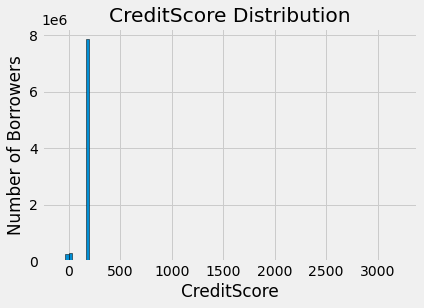

In [3]:
import matplotlib.pyplot as plt
# Histogram of the CreditScore
plt.style.use('fivethirtyeight')
plt.hist(data['CreditScore'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('CreditScore'); plt.ylabel('Number of Borrowers'); 
plt.title('CreditScore Distribution');

In [8]:
# Create a list of borrowers with more than 100 measurements
types = data.dropna(subset=['CreditScore'])
types = types['MaritalStatus'].value_counts()
types = list(types[types.values > 100].index)

# Plot of distribution of scores for building categories
%pylab
figsize(12, 10)

import seaborn as sns
# Plot each building
for b_type in types:
    # Select the MaritalStatus type
    subset = data[data['MaritalStatus'] == b_type]
    
    # Density plot of CreditScore
    sns.kdeplot(subset['CreditScore'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('CreditScore', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of CreditScore by MaritalStatus Type', size = 28);
plt.legend()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [10]:
# Create a list of borrowers with more than 100 measurements
types = data.dropna(subset=['CreditScore'])
types = types['Sex'].value_counts()
types = list(types[types.values > 100].index)

# Plot of distribution of scores for borrower categories
%pylab
figsize(12, 10)

import seaborn as sns
# Plot each borrower
for b_type in types:
    # Select the Education type
    subset = data[data['Sex'] == b_type]
    
    # Density plot of CreditScore
    sns.kdeplot(subset['CreditScore'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('CreditScore', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of CreditScore by Sex', size = 28);
plt.legend()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [12]:
#Find all correlations with the score and sort 
correlations_data = data.corr()['CreditScore'].sort_values()

In [13]:
print(correlations_data)

APR                  -0.511184
CompanySize          -0.458040
BidAmount            -0.274675
SeriousDefaultLoan   -0.139854
DefaultTimes         -0.135999
RepaymentPeriod      -0.112495
Sex                  -0.101123
Age                  -0.089787
DefaultAmount        -0.063782
carLoan              -0.040302
houseLoan            -0.019972
RepaySource          -0.010014
MaritalStatus         0.022701
Income                0.057125
Bidders               0.083785
LoanNumbers           0.086108
WorkingHour           0.088987
PaidOffTimes          0.099756
Credits               0.117109
TotalAmount           0.122654
hasHouse              0.210446
hasCar                0.214635
SuccessfulNum         0.276071
Education             0.383492
CertifiMark           0.896515
CreditScore           1.000000
Name: CreditScore, dtype: float64


In [16]:
#Find all correlations with the score and sort 
data.corr()['APR'].sort_values()

CreditScore          -0.511184
CertifiMark          -0.472513
Education            -0.335842
hasCar               -0.171663
WorkingHour          -0.167826
Credits              -0.153435
TotalAmount          -0.143329
Bidders              -0.134546
Income               -0.106991
hasHouse             -0.100193
RepaymentPeriod      -0.038134
SuccessfulNum        -0.025666
MaritalStatus        -0.013424
PaidOffTimes          0.012359
Age                   0.021564
DefaultAmount         0.032489
houseLoan             0.037640
Sex                   0.054088
SeriousDefaultLoan    0.072993
BidAmount             0.081154
DefaultTimes          0.085853
carLoan               0.088902
LoanNumbers           0.091629
RepaySource           0.238835
CompanySize           0.251034
APR                   1.000000
Name: APR, dtype: float64

In [28]:
subset['Education'].value_counts()

2.0    636919
1.0    317718
Name: Education, dtype: int64

In [31]:
figsize(30, 20)
# Subset to the buildings with most measurements and remove outliers



subset = subset.dropna(subset=['Education'])

# Linear Plot of Energy Star Score vs EUI
sns.lmplot('APR', 'CreditScore', 
           data = subset, hue = 'Education', 
           scatter_kws={'alpha': 0.8, 's': 32}, fit_reg=False, 
           size = 12, aspect = 1.2)

plt.title('CreditScore vs APR', size = 24)
plt.legend()

C:\Users\mb95424\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mb95424\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [36]:
# List of Variables to find correlation coefficients
features = ['Bidders',
            'Education',
            'Income',
             'PaidOffTimes',
            'APR',
            'CreditScore']

subset = data[features].dropna()

# Remove outliers
subset = subset[subset['CreditScore'] < 500]

In [37]:
# Group by the building type and calculate correlations
corrs = pd.DataFrame(subset.groupby('Education').corr())
corrs = pd.DataFrame(corrs['CreditScore'])

# Format the dataframe for display
corrs = corrs.reset_index()
corrs.columns = ['Education', 'Variable', 'Correlation with Score']
corrs = corrs[corrs['Variable'] != 'CreditScore']
corrs

,Education,Variable,Correlation with Score
0,1.0,Bidders,0.476520
1,1.0,Income,0.273887
2,1.0,PaidOffTimes,0.367586
3,1.0,APR,-0.440418
5,2.0,Bidders,0.352161
6,2.0,Income,0.304726
7,2.0,PaidOffTimes,0.216166
8,2.0,APR,-0.600935
10,3.0,Bidders,0.224274
11,3.0,Income,0.249126


In [38]:
def corr_df(x, corr_val):
    # Dont want to remove correlations between Energy Star Score
    y = x['CreditScore']
    x = x.drop(columns = ['CreditScore'])
    
    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['APR'])
    x['CreditScore'] = y
               
    return x

In [39]:
data.shape

(8469232, 28)

In [40]:
new_data = corr_df(data, corr_val = 0.5)

RepaymentPeriod | BidAmount | 0.64
RepaySource | BidAmount | 0.68
Credits | BidAmount | 0.58
Credits | RepaymentPeriod | 0.6
Credits | RepaySource | 0.59
Credits | Bidders | 0.5
SuccessfulNum | LoanNumbers | 0.95
TotalAmount | BidAmount | 0.65
TotalAmount | RepaymentPeriod | 0.65
TotalAmount | RepaySource | 0.63
TotalAmount | Bidders | 0.55
TotalAmount | Credits | 0.82
PaidOffTimes | LoanNumbers | 0.65
PaidOffTimes | SuccessfulNum | 0.66
SeriousDefaultLoan | DefaultTimes | 0.7


In [41]:
new_data.shape

(8469232, 20)

In [42]:
log_data = new_data.copy()

for col in new_data.select_dtypes('number').columns:
    log_data['log_%s' % col] = np.log10(new_data[col])
    
log_data = log_data.replace({-np.inf: np.nan})

C:\Users\mb95424\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mb95424\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [43]:
for col in log_data.select_dtypes('number').columns:
    if np.any(np.isinf(log_data[col])):
        print(col)

In [44]:
log_data.corr()['CreditScore'].sort_values()

log_DefaultTimes    -0.574718
log_CompanySize     -0.471538
CompanySize         -0.458040
log_BidAmount       -0.345698
BidAmount           -0.274675
DefaultTimes        -0.135999
log_DefaultAmount   -0.129936
log_Age             -0.111718
log_Sex             -0.101123
Sex                 -0.101123
Age                 -0.089787
DefaultAmount       -0.063782
log_carLoan         -0.040302
carLoan             -0.040302
log_Bidders         -0.027968
houseLoan           -0.019972
log_houseLoan       -0.019972
log_MaritalStatus    0.019418
MaritalStatus        0.022701
Income               0.057125
log_WorkingHour      0.061266
Bidders              0.083785
LoanNumbers          0.086108
WorkingHour          0.088987
log_Income           0.102349
log_LoanNumbers      0.117664
hasHouse             0.210446
log_hasHouse         0.210446
hasCar               0.214635
log_hasCar           0.214635
Education            0.383492
log_Education        0.400246
CertifiMark          0.896515
log_Certif

In [45]:
#Machine Learning Approach


def train_test_reg(df):

    
    X = df.select_dtypes('number')
    
    X['Education'] = df['Education']
    X['MaritalStatus'] = df['MaritalStatus']
    X['CertifiMark'] = df['CertifiMark']
    
    X = pd.get_dummies(X)
    
    missing_scores = X[X['CreditScore'].isnull()]
    
    X = X.dropna(subset = ['CreditScore'])
    
    y = X['CreditScore']
    
    X = X.drop(columns = ['CreditScore'])
    missing_scores = missing_scores.drop(columns = ['CreditScore'])
    feature_names = list(X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    imputer = Imputer(missing_values = 'NaN', strategy = 'median')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    missing_scores = imputer.transform(missing_scores)
    
    return X_train, X_test, y_train, y_test, missing_scores, feature_names

In [57]:
X_train, X_test, y_train, y_test, missing_scores, feature_names = train_test_reg(new_data)
print('Training Data Shape:', X_train.shape)
print('Testing Data Shape:', X_test.shape)

<ipython-input-45-cc96798e315e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Education'] = df['Education']
<ipython-input-45-cc96798e315e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MaritalStatus'] = df['MaritalStatus']
<ipython-input-45-cc96798e315e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

NameError: name 'Imputer' is not defined